In [1]:
import mne
import numpy as np
import pytest
from pyautomagic.preprocessing import performFilter
import matplotlib.pyplot as plt

In [2]:
# Generate 20s dummy EEG data(sampling freq 1kHz)
# composed of low freq part(10Hz), high freq part(80Hz), power freq part(60Hz),
# white noise(normal distribution with DC offset)
times = np.arange(0, 20, .001)
sfreq = 1000
low_freq_signal = 5*np.sin(2*np.pi*10*times)
high_freq_signal = np.cos(2*np.pi*80*times)
power_freq_noise = 2*np.sin(2*np.pi*60*times)
# white_noise = np.random.normal(0.5,size=np.size(times))
input_signal = low_freq_signal + high_freq_signal + power_freq_noise

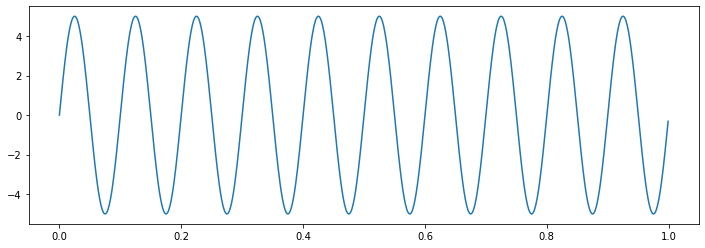

In [3]:
plt.figure(figsize=(12,4))
plt.plot(times[0:sfreq], low_freq_signal[0:sfreq])

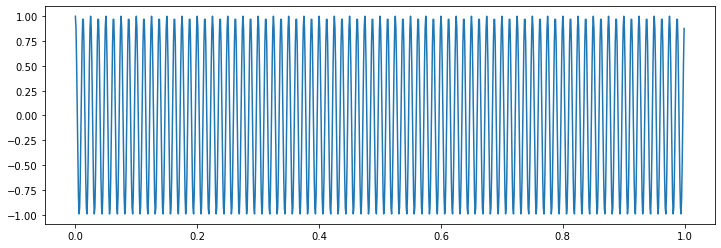

In [4]:
plt.figure(figsize=(12,4))
plt.plot(times[0:sfreq], high_freq_signal[0:sfreq])

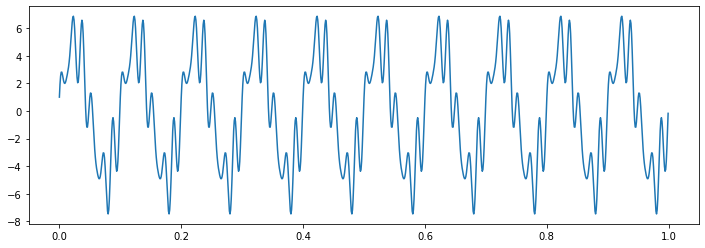

In [5]:
plt.figure(figsize=(12,4))
plt.plot(times[0:sfreq], input_signal[0:sfreq])

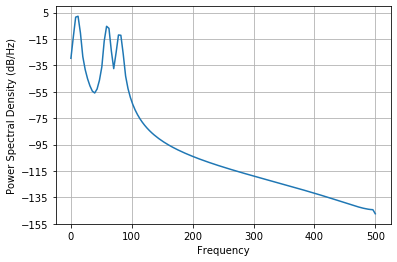

In [6]:
Pxx, freqs = plt.psd(input_signal, Fs=sfreq)

In [7]:
output_lowpass_filt = performFilter.performFilter(input_signal, sfreq, 'low', 30)
output_highpass_filt = performFilter.performFilter(input_signal, sfreq, 'high', 50)
output_notch_filt = performFilter.performFilter(input_signal, sfreq, 'notch')

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up high-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 50.00
- Lower transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 43.75 Hz)
- Filter length: 265 samples (0.265 sec)



Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 sec)



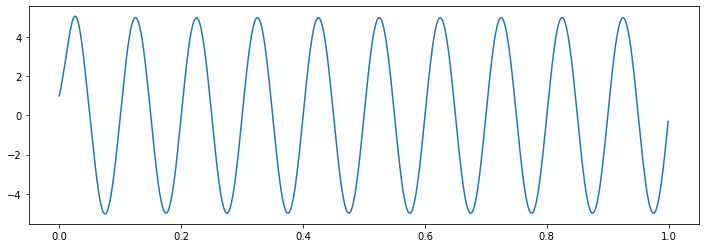

In [8]:
plt.figure(figsize=(12,4))
plt.plot(times[0:sfreq], output_lowpass_filt[0:sfreq])

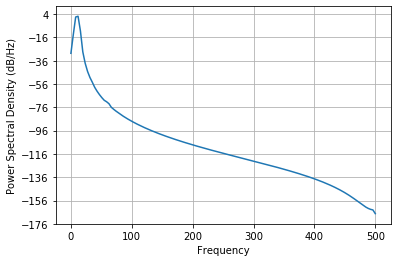

In [9]:
Pxx_out, freqs = plt.psd(output_lowpass_filt, Fs=sfreq)

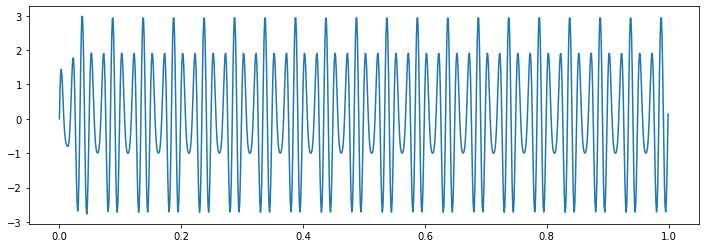

In [10]:
plt.figure(figsize=(12,4))
plt.plot(times[0:sfreq], output_highpass_filt[0:sfreq])

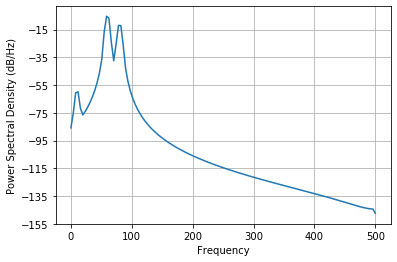

In [11]:
Pxx_out, freqs = plt.psd(output_highpass_filt, Fs=sfreq)

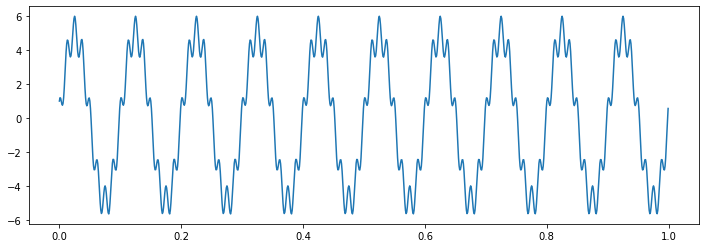

In [12]:
plt.figure(figsize=(12,4))
plt.plot(times[0:sfreq], output_notch_filt[0:sfreq])

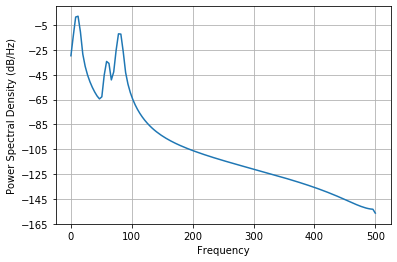

In [13]:
Pxx_out, freqs = plt.psd(output_notch_filt, Fs=sfreq)